Inputs:
- $\Delta$Price
- News senitment score
- Bullish/Bearish Percent
- Moving Averages
- $\Delta$Volume
- RSI
- VWAP

All of these inputs are good, indicators are probably not as useful so we should add a layer to scale do

Couldn't find 2024-08-15.csv
Couldn't find 2024-11-07.csv
Scanned files
Calculated Differences
Analyzed 1049329 datapoints


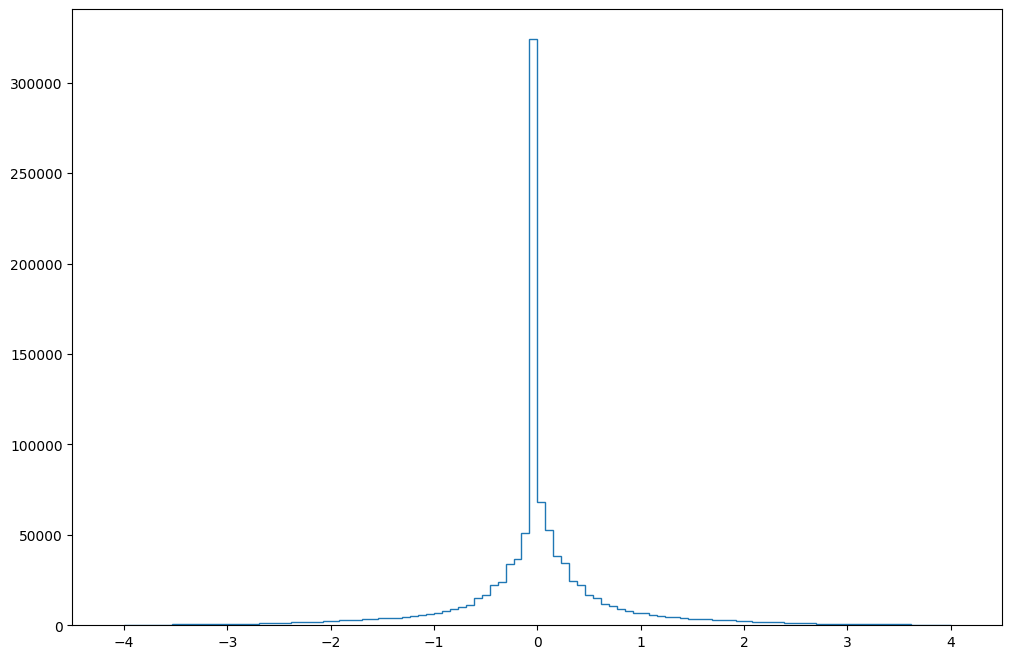

In [8]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

dates = [(datetime.now() - timedelta(days=i)).strftime("%Y-%m-%d") for i in range(1, (365 + 367))]
dates.reverse()

prices = pd.DataFrame()

for date in dates:
    try:
        prices = pd.concat([prices, pd.read_csv(f'../data/{date}.csv').copy()[["open_time", "high", "low", "open", "close"]]])
    except:
        print(f'Couldn\'t find {date}.csv')

print("Scanned files")

p = np.array(prices["close"])
p = [p[i] - p[i-1] for i in range(1, len(p))]

print("Calculated Differences")

avg = np.mean(p)
std = np.std(p)

arr = np.array([(d - avg)/ std for d in p])

counts, bins = np.histogram(arr, bins=int(len(p)/10000), range=(-4, 4))

print('Analyzed ' + str(len(p)) + ' datapoints')

plt.figure(figsize=(12,8))
plt.xlim(-4.5, 4.5)
plt.stairs(counts, bins)
plt.show()